In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
link = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
covid = pd.read_csv(link)
election = pd.read_csv('Popular vote backend - Sheet1.csv')



In [12]:
election[election['stateid'] != "NaN"]

,state,called,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,other_percent,dem_this_margin,...,stateid,EV,X,Y,State_num,Center_X,Center_Y,Unnamed: 19,2016 Margin,Total 2016 Votes
0,U.S. Total,D,Yes,"81,282,916","74,223,369","2,891,441",51.3%,46.9%,1.8%,4.5%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020995,"136,639,848"
1,15 Key Battlegrounds,NaN,NaN,"31,908,248","33,002,287","950,354",48.4%,50.1%,1.4%,-1.7%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036220,"56,209,173"
2,Non-Battlegrounds,NaN,NaN,"49,374,668","41,221,082","1,941,087",53.4%,44.5%,2.1%,8.8%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060978,"80,430,331"
3,15 Key Battlegrounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arizona,D,Yes,"1,672,143","1,661,686","53,497",49.4%,49.1%,1.6%,0.3%,...,AZ,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Vermont,D,Yes,"242,820","112,704","11,904",66.1%,30.7%,3.2%,35.4%,...,VT,3.0,10.0,6.0,50.0,873.0,134.0,NaN,0.264084,"315,067"
57,Virginia,D,Yes,"2,413,568","1,962,430","84,526",54.1%,44.0%,1.9%,10.1%,...,VA,13.0,8.0,3.0,51.0,809.0,299.0,NaN,0.053212,"3,982,752"
58,Washington,D,Yes,"2,369,612","1,584,651","133,368",58.0%,38.8%,3.3%,19.2%,...,WA,12.0,1.0,5.0,53.0,128.0,58.0,NaN,0.157060,"3,365,644"
59,West Virginia,R,Yes,"235,984","545,382","13,286",29.7%,68.6%,1.7%,-38.9%,...,WV,5.0,7.0,3.0,54.0,765.0,284.0,NaN,-0.420727,"713,051"


In [13]:
covid

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
30644,2021-09-10,Virginia,51,801827,12036
30645,2021-09-10,Washington,53,599971,6977
30646,2021-09-10,West Virginia,54,205783,3207
30647,2021-09-10,Wisconsin,55,754164,8613


In [14]:
election = election[['state','called','stateid']]
election
covid = covid[['state','cases','deaths']]

In [15]:
#result = pd.concat([election,covid], ignore_index=True, sort = False)
#result

In [16]:
#result.groupby(by=["state"], dropna=True).sum()

In [17]:
combined = pd.merge(election,covid, on='state')
combined

,state,called,stateid,cases,deaths
0,Arizona,D,AZ,1,0
1,Arizona,D,AZ,1,0
2,Arizona,D,AZ,1,0
3,Arizona,D,AZ,1,0
4,Arizona,D,AZ,1,0
...,...,...,...,...,...
28474,Wyoming,R,WY,77206,858
28475,Wyoming,R,WY,78495,879
28476,Wyoming,R,WY,79297,879
28477,Wyoming,R,WY,79830,879


In [18]:
combined = combined.groupby(['state','called']).agg({'cases': 'sum'})
combined

,,cases
state,called,
Alabama,R,167486692
Alaska,R,19723501
Arizona,D,263418570
Arkansas,R,105342056
California,D,1116148827
Colorado,D,150756024
Connecticut,D,97626297
Delaware,D,30234951
District of Columbia,D,15189145


In [27]:
combined.nlargest(50,'cases')

,,cases
state,called,
California,D,1116148827
Texas,R,881766335
Florida,R,702349876
New York,D,605982442
Illinois,D,413045889
Georgia,D,330379813
Pennsylvania,D,322625448
Ohio,R,308901719
New Jersey,D,290325613


/Users/thembi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of COVID Cases')

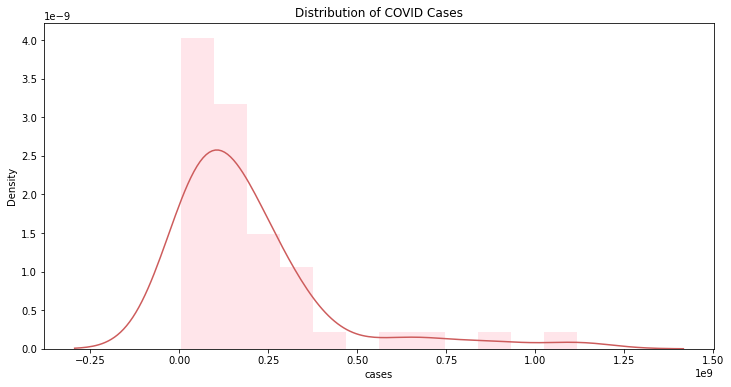

In [31]:
import seaborn as sns 
plt.figure(figsize=(12,6))
dataset=combined['cases']
p = sns.distplot(dataset,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'pink','label':"HISTOGRAM"},)
p.set_title("Distribution of COVID Cases")

array([[<AxesSubplot:title={'center':'cases'}>]], dtype=object)

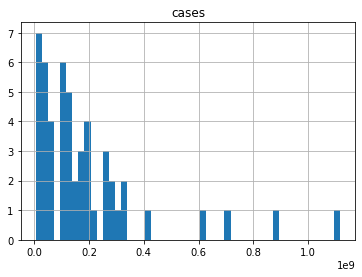

In [32]:
combined.hist(bins=50)